## Modules à importer

In [2]:
import math
import scipy
import pickle
import numpy as np
import pandas as pd
import iminuit as im
import ipywidgets as ipw
from importlib import reload
from scipy.stats import poisson
from scipy.optimize import fsolve
from variaIa.variaIa import baserate
from scipy.interpolate import interp1d
from variaIa.variaIa import stretchevol
from variaIa.variaIa import ratefitnb
from astropy.cosmology import Planck15 as cosmo
import matplotlib.pyplot as plt
import random

## Définitions et sélection de l'échantillon à utiliser

In [3]:
d = pd.read_csv('../Data/data_cheat.csv', sep=' ', index_col = 'CID')
d_snf = pd.read_csv('../Data/lssfr_paper_full_sntable.csv',sep=',')

surveys = ['SNF', 'SDSS', 'PS1', 'SNLS', 'HST']

su = ipw.Dropdown(options=surveys,
                  description='Survey:',
                  value = 'PS1')

surv = {'SNF':  d_snf,
        'SDSS': d[d['IDSURVEY'] == 1],
        'PS1':  d[d['IDSURVEY'] == 15],
        'SNLS': d[d['IDSURVEY'] == 4],
        'HST':  d[d['IDSURVEY'].isin([101, 100, 106])]}

# .loc[d_snf['name'].str.contains('SNF|LSQ|PTF',na=False,regex=True)]

colors = {'SNF': 'orange',
          'SDSS': 'lime',
          'PS1': 'blue',
          'SNLS': 'red',
          'HST': 'purple'}

def set_data(su):
    global ns_dataz, dataz, ns_datax, datax
    if su == 'SNF':
        ns_dataz = surv[su]['host.zcmb'].values
        dataz = np.sort(ns_dataz)
        ns_datax = surv[su]['salt2.X1'].values
        datax = np.sort(ns_datax)
    else:
        ns_dataz = surv[su].zCMB.values
        dataz = np.sort(ns_dataz)
        ns_datax = surv[su].x1.values
        datax = np.sort(ns_datax)
    
int_data = ipw.interactive(set_data, su = su)
display(int_data)

interactive(children=(Dropdown(description='Survey:', index=2, options=('SNF', 'SDSS', 'PS1', 'SNLS', 'HST'), …

## Plot tentative

In [4]:
N_sum = np.asarray([i*1 for i in range(1, len(dataz)+1)]).T

In [5]:
a = 2.5e-8
N_expt = a*cosmo.comoving_volume(dataz).value

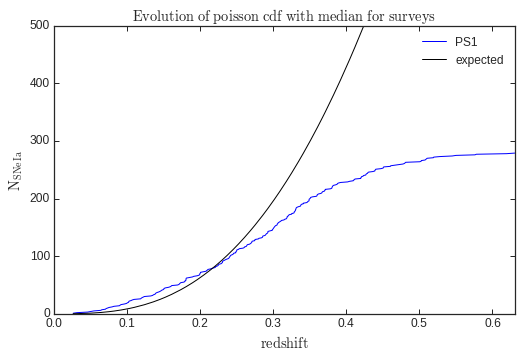

In [7]:
fig = plt.figure(figsize=[8, 5])
ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

ax.plot(dataz,
        N_sum,
        color=colors[su.value],
        lw=1.0, label=su.value)

ax.plot(dataz,
        N_expt,
        color='black',
        lw=1.0, label='expected')

ax.tick_params(direction='in',
               length=5, width=1,
               labelsize=12,
               top=True, right=True)

ax.set_xlim(0, np.max(dataz))
ax.set_ylim(0, 500)

ax.set_xlabel(r'$\mathrm{redshift}$', fontsize='x-large')
ax.set_ylabel(r'$\mathrm{N}_\mathrm{SNe\,Ia}$', fontsize='x-large')
                                                                        
plt.legend(ncol=1, loc='upper right')
                                                                        
plt.title(r'$\mathrm{Evolution\,\,of\,\,poisson\,\,cdf\,\,with\,\,}$' +
          r'$\mathrm{median\,\,for\,\,surveys}$',
          fontsize='x-large')

plt.show()

In [176]:
test.get_cuts(.3)[1]

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147])

In [175]:
test.get_ratemodel(test.get_cuts(.3)[0], 2.5)

array([1.63956685e-01, 2.80143225e-01, 8.66424488e-01, 1.10833898e+00,
       1.42929324e+00, 2.29505446e+00, 2.43502819e+00, 3.03802640e+00,
       3.12770452e+00, 3.43452049e+00, 3.70232375e+00, 4.32591366e+00,
       4.75479190e+00, 6.12481367e+00, 6.32754989e+00, 6.59757069e+00,
       7.56684707e+00, 8.30244571e+00, 8.54926166e+00, 9.00543733e+00,
       9.03123292e+00, 9.21314532e+00, 9.90959093e+00, 1.03546551e+01,
       1.11051478e+01, 1.39382092e+01, 1.41788875e+01, 1.45976889e+01,
       1.51323065e+01, 1.57532833e+01, 1.92305234e+01, 2.03444903e+01,
       2.07395250e+01, 2.17713401e+01, 2.19540781e+01, 2.23224997e+01,
       2.30711857e+01, 2.42240831e+01, 2.50626279e+01, 2.57162448e+01,
       2.62263772e+01, 2.72659589e+01, 2.77422294e+01, 2.77954741e+01,
       2.88741165e+01, 3.12253959e+01, 3.26221056e+01, 3.33351266e+01,
       3.38159428e+01, 3.88683827e+01, 4.02019949e+01, 4.05398707e+01,
       4.12210157e+01, 4.17711259e+01, 4.47355751e+01, 4.58256727e+01,
      

In [18]:
reload(ratefitnb)

test = ratefitnb.RateFit()
test.set_data(dataz)
test.set_param([1, .3])
test.minimize(limit_a=(2.5, 5), limit_zmax=(.2, .3))

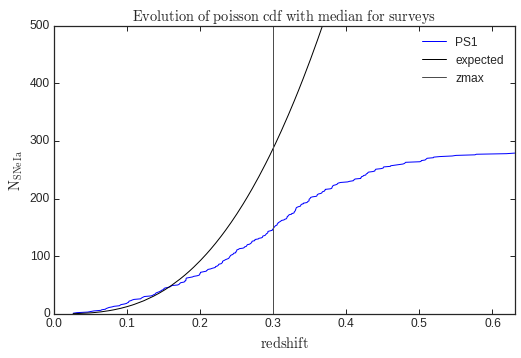

In [19]:
reload(ratefitnb)

test.plot("PS1")

In [20]:
test.param

{'a': 3.6680861328443477, 'zmax': 0.2994857491749853}

In [21]:
test.migrad_out[0]['fval']

-494023.4171026062

In [23]:
test.migrad_out[1][1][3]

nan

In [24]:
a = ipw.FloatSlider(min = .5, max = 5.,
                    value = 2.5, step=.01,
                    description='a value:',
                    continuous_update=True)

zmax = ipw.FloatSlider(min = .2, max = .35,
                       value = .28, step=.01,
                       description='zmax value:',
                       continuous_update=True)

def get_log(a, zmax):
    return(-np.sum((test.get_cuts(zmax)[1]
                    - test.get_ratemodel(test.get_cuts(zmax)[0], a))**2))

def get_aicc(a, zmax):
    k = 2
    logl = get_log(a, zmax)
    print('Log L = ', -np.sum((test.get_cuts(zmax)[1]
                               - test.get_ratemodel(test.get_cuts(zmax)[0], a))**2))
    print('AICc = ', 2*k + logl + (2*k*(k+1))/(len(test.get_cuts(zmax)[0])-k-1))

    fig = plt.figure(figsize=[8, 5])
    ax = fig.add_axes([0.1, 0.12, 0.8, 0.8])

    ax.plot(test.data,
            test.counts,
            color='blue',
            lw=1.0, label="PS1")

    ax.plot(test.data,
            test.get_ratemodel(test.data, a),
            color='black',
            lw=1.0, label='expected')

    ax.vline(zmax,
             color=".3",
             lw=1.0, label="zmax")
    
    
    ax.tick_params(direction='in',
                   length=5, width=1,
                   labelsize=12,
                   top=True, right=True)

    ax.set_xlim(0, np.max(test.data))
    ax.set_ylim(0, 500)

    ax.set_xlabel(r'$\mathrm{redshift}$', fontsize='x-large')
    ax.set_ylabel(r'$\mathrm{N}_\mathrm{SNe\,Ia}$', fontsize='x-large')

    plt.legend(ncol=1, loc='upper right')

    plt.title(r'$\mathrm{Evolution\,\,of\,\,poisson\,\,cdf\,\,with\,\,}$' +
              r'$\mathrm{median\,\,for\,\,surveys}$',
              fontsize='x-large')

inter_aicc = ipw.interactive(get_aicc, a=a, zmax=zmax)

display(inter_aicc)

interactive(children=(FloatSlider(value=2.5, description='a value:', max=5.0, min=0.5, step=0.01), FloatSlider…